In [1]:
from pyextremes import EVA, __version__
print("pyextremes", __version__)

pyextremes 2.2.4


In [2]:
import numpy as np
import pandas as pd

In [3]:
#import data
data = (
    pd
    .read_csv("ai_count_no_outliers.csv")
    .dropna()
)
data.head()

,Unnamed: 0,date,count
0,0,2020/01/01,13.0
1,1,2020/01/02,22.0
2,2,2020/01/03,24.0
3,3,2020/01/04,14.0
4,4,2020/01/05,6.0


<AxesSubplot:>

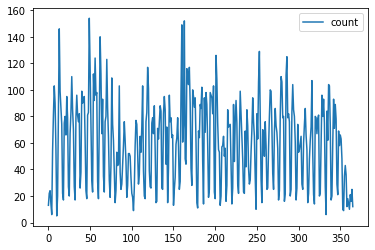

In [4]:
#clean it a lil
data.drop(['Unnamed: 0'], inplace = True, axis = 1)
data.plot()

In [5]:
#Formatting the date and time
data['date'] = pd.DatetimeIndex(data.date)

#Converting columns into arrays
data_date = data['date'].to_numpy()
data_count = data['count'].to_numpy()

In [6]:
#Converting into series
data_series = pd.Series(data = data_count, index = data_date)

data_series

2020-01-01    13.0
2020-01-02    22.0
2020-01-03    24.0
2020-01-04    14.0
2020-01-05     6.0
              ... 
2020-12-27    10.0
2020-12-28    21.0
2020-12-29    16.0
2020-12-30    25.0
2020-12-31    12.0
Length: 366, dtype: float64

In [7]:
model = EVA(data=data_series)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          None      Size:                                 366
Start:                       January 2020      End:                        December 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Extreme values have not been extracted
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fit to the extremes

In [8]:
model.get_extremes(
    method="BM",
    extremes_type="high",
    block_size= pd.Timedelta("60 days"),
    errors="raise",
)
model

                           Univariate Extreme Value Analysis                            
                                      Source Data                                       
----------------------------------------------------------------------------------------
Data label:                          None      Size:                                 366
Start:                       January 2020      End:                        December 2020
                                     Extreme Values                                     
----------------------------------------------------------------------------------------
Count:                                  7      Extraction method:                     BM
Type:                                high      Block size:              60 days 00:00:00
                                         Model                                          
----------------------------------------------------------------------------------------
Model has not been fi

In [9]:
help(EVA.get_extremes)

Help on function get_extremes in module pyextremes.eva:

get_extremes(self, method: str, extremes_type: str = 'high', **kwargs) -> None
    Get extreme events from time series.
    
    Extracts extreme values from the 'self.data' attribute.
    Stores extreme values in the 'self.extremes' attribute.
    
    Parameters
    ----------
    method : str
        Extreme value extraction method.
        Supported values:
            BM - Block Maxima
            POT - Peaks Over Threshold
    extremes_type : str, optional
        high (default) - get extreme high values
        low - get extreme low values
    kwargs
        if method is BM:
            block_size : str or pandas.Timedelta, optional
                Block size (default='365.2425D').
                See pandas.to_timedelta for more information.
            errors : str, optional
                raise (default) - raise an exception
                    when encountering a block with no data
                ignore - ignore bloc

(<Figure size 768x480 with 1 Axes>,
 <AxesSubplot:xlabel='date-time', ylabel='extreme values'>)

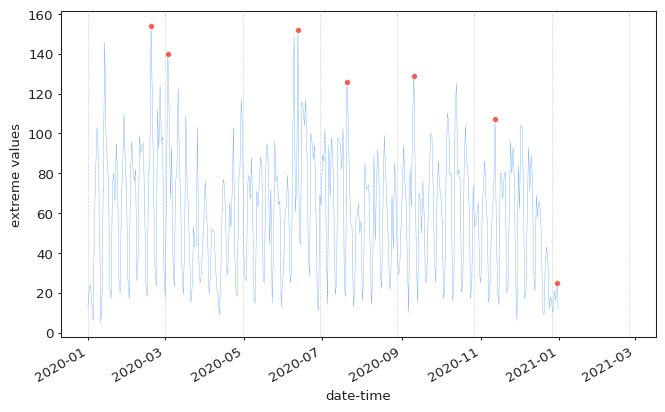

In [10]:
model.plot_extremes()